Quick analysis of TIW-related SST/SSH variability and its relation to ENSO

In [1]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import cftime
from scipy import signal

import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft
import sys, os
import warnings
warnings.simplefilter("ignore") 

import cosima_cookbook as cc

from dask.distributed import Client

In [2]:
# Load workers:
client = Client(n_workers=4)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 4,Total memory: 11.23 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37585,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 4
Started: Just now,Total memory: 11.23 GiB
Comm: tcp://10.0.128.140:38931,Total threads: 1
Dashboard: /proxy/44269/status,Memory: 2.81 GiB
Nanny: tcp://127.0.0.1:37245,


In [3]:
# Load observational data objects:
OISST = xr.open_mfdataset('/g/data/ua8/NOAA_OISST/AVHRR/v2-1_modified/*.nc',concat_dim="time", combine="nested",
                  data_vars='minimal', coords='minimal', compat='override',parallel=True)

In [5]:
CMEMS = xr.open_mfdataset('/g/data/ua8/CMEMS_SeaLevel/v2019/****/*.nc',concat_dim="time", combine="nested",
                  data_vars='minimal', coords='minimal', compat='override',parallel=True)

In [ ]:
# Nino 3.4:
nino34 = OISST.anom.isel(zlev=0).sel(lon=slice(-170.+360.,-120.+360.)).sel(lat=slice(-5.,5.)).mean('lon').mean('lat')
nino34 = nino34.resample(time="1MS").mean(dim="time")
nino34.load();

In [46]:
# An (2008) SST index:
SST = OISST.anom.isel(zlev=0).sel(lon=-140.+360.,method='nearest').sel(lat=2.0,method='nearest')
SSTmm = SST.rolling(time=30,center=True).mean()
TIWindex = np.sqrt(((SST-SSTmm)**2.0).rolling(time=30,center=True).mean())
TIWindex = TIWindex.resample(time="1MS").mean(dim="time")
TIWindex = TIWindex-TIWindex.mean('time').values
TIWindex.load()

<xarray.DataArray 'anom' (time: 14722)>
array([nan, nan, nan, ..., nan, nan, nan])
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01T12:00:00 ... 2021-12-21T12:00:00
    lon      float32 220.1
    lat      float32 2.125
    zlev     float32 0.0

0.5347421450210549
0.6045758826182344
0.7220202879603291


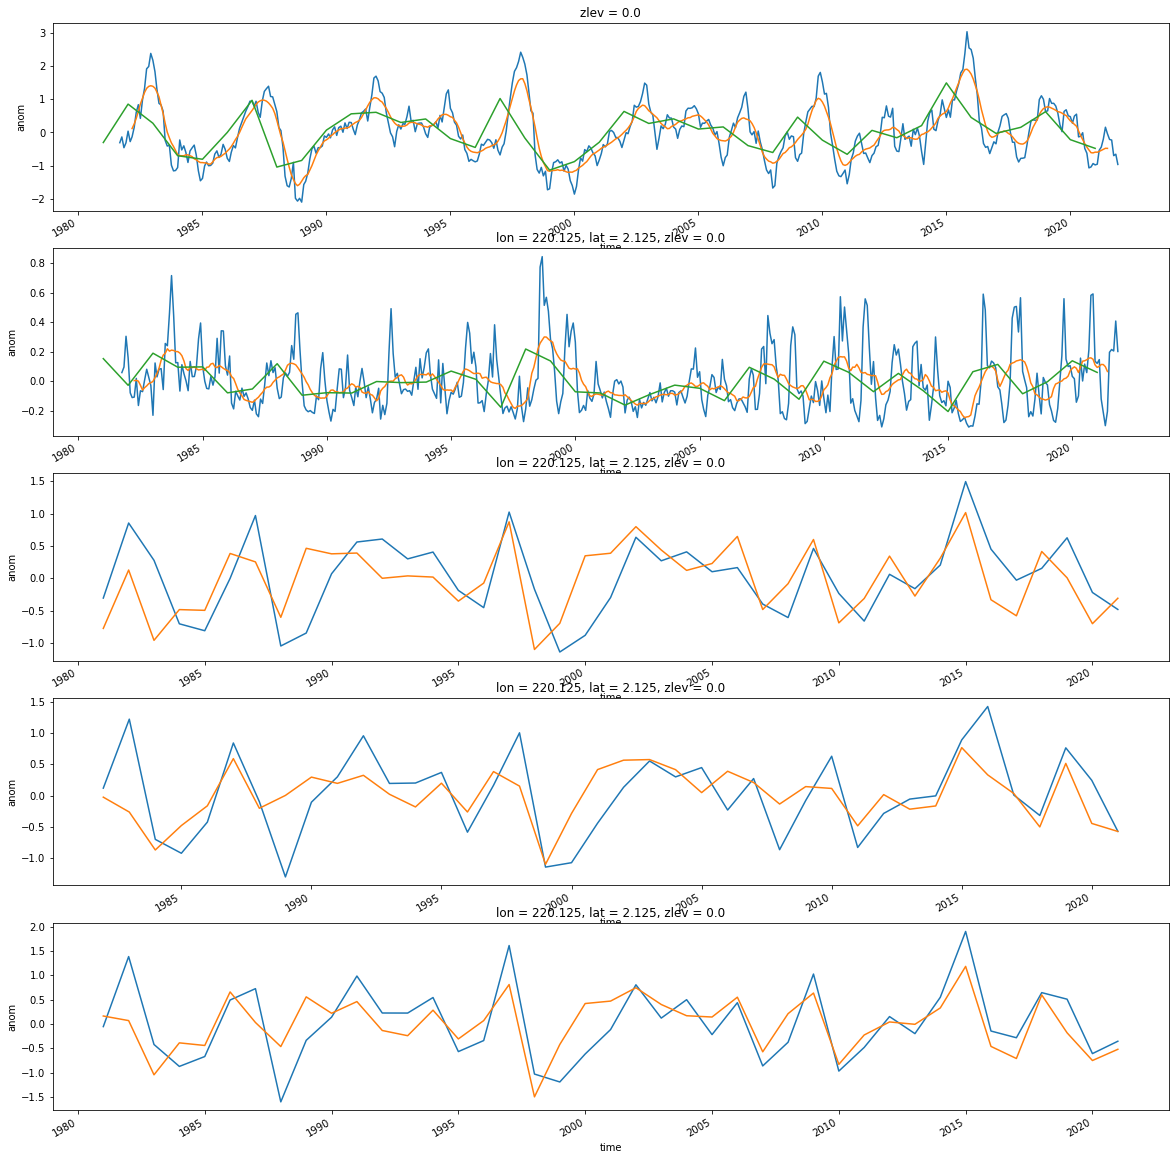

In [67]:
plt.figure(figsize=(20,20))

plt.subplot(5,1,1)
nino34.plot()
nino34.rolling(time=12,center=True).mean().plot()
nino34.resample(time="1YS").mean(dim="time").plot()
plt.subplot(5,1,2)
TIWindex.plot()
TIWindex.rolling(time=12,center=True).mean().plot()
TIWindex.resample(time="1YS").mean(dim="time").plot()

plt.subplot(5,1,3)
nino34.resample(time="1YS").mean(dim="time").plot()
(-5*TIWindex).resample(time="1YS").mean(dim="time").plot()
print(xr.corr(nino34.resample(time="1YS").mean(dim="time"),(-5*TIWindex).resample(time="1YS").mean(dim="time")).values)

plt.subplot(5,1,4)
nino34.shift(time=4).resample(time="1YS").mean(dim="time").plot()
(-5*TIWindex).shift(time=4).resample(time="1YS").mean(dim="time").plot()
print(xr.corr(nino34.shift(time=4).resample(time="1YS").mean(dim="time"),(-5*TIWindex).shift(time=4).resample(time="1YS").mean(dim="time")).values)

plt.subplot(5,1,5)
nino34.shift(time=-4).resample(time="1YS").mean(dim="time").plot()
(-5*TIWindex).shift(time=-4).resample(time="1YS").mean(dim="time").plot()
print(xr.corr(nino34.shift(time=-4).resample(time="1YS").mean(dim="time"),(-5*TIWindex).shift(time=-4).resample(time="1YS").mean(dim="time")).values)